<a href="https://colab.research.google.com/github/Chocolatine-sama/Colab/blob/main/M2S1_TP_Traitement_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEBRUITAGE ET REHAUSSEMENT D'IMAGES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

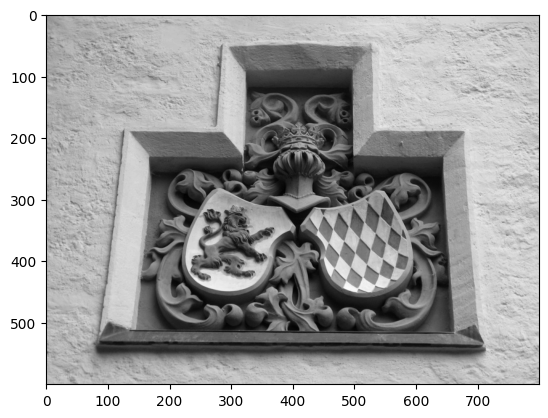

In [ ]:
coat_ideal = plt.imread('coat_of_arms.png')
plt.imshow(coat_ideal, cmap='gray')

In [ ]:
print(coat_ideal)
print(coat_ideal.shape)

[[0.627451   0.60784316 0.6117647  ... 0.74509805 0.7411765  0.7411765 ]
 [0.58431375 0.6        0.6039216  ... 0.7490196  0.74509805 0.7490196 ]
 [0.5529412  0.5686275  0.5882353  ... 0.7490196  0.7490196  0.7490196 ]
 ...
 [0.7176471  0.7137255  0.72156864 ... 0.67058825 0.6313726  0.64705884]
 [0.7137255  0.7137255  0.72156864 ... 0.7490196  0.72156864 0.7019608 ]
 [0.7176471  0.7137255  0.7176471  ... 0.8        0.77254903 0.7372549 ]]
(600, 800)


In [ ]:
moy_kernel = np.ones([20,20]) * 1/(20*20)
moy_kernel

array([[0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
   

In [ ]:
coat_blur = sp.signal.convolve2d(coat_ideal, moy_kernel, 'same')

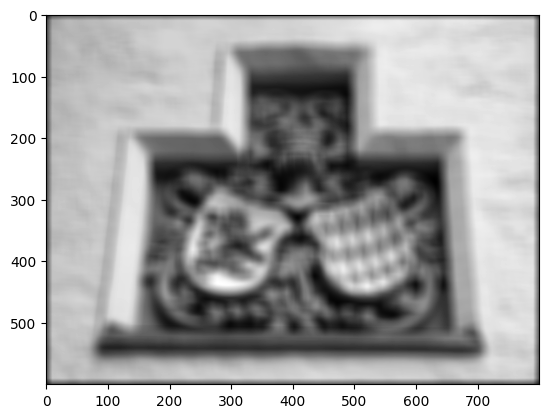

In [ ]:
plt.imshow(coat_blur, cmap='gray')

In [ ]:
coat_ideal_ft = np.fft.fft2(coat_ideal)
coat_blur_ft = np.fft.fft2(coat_blur)
moy_kernel_ft = np.fft.fft2(moy_kernel, s=coat_ideal.shape)

In [ ]:
coat_ideal_ft_shift =np.fft.fftshift(coat_ideal_ft)
coat_blur_ft_shift =np.fft.fftshift(coat_blur_ft)
moy_kernel_ft_shift =np.fft.fftshift(moy_kernel_ft)

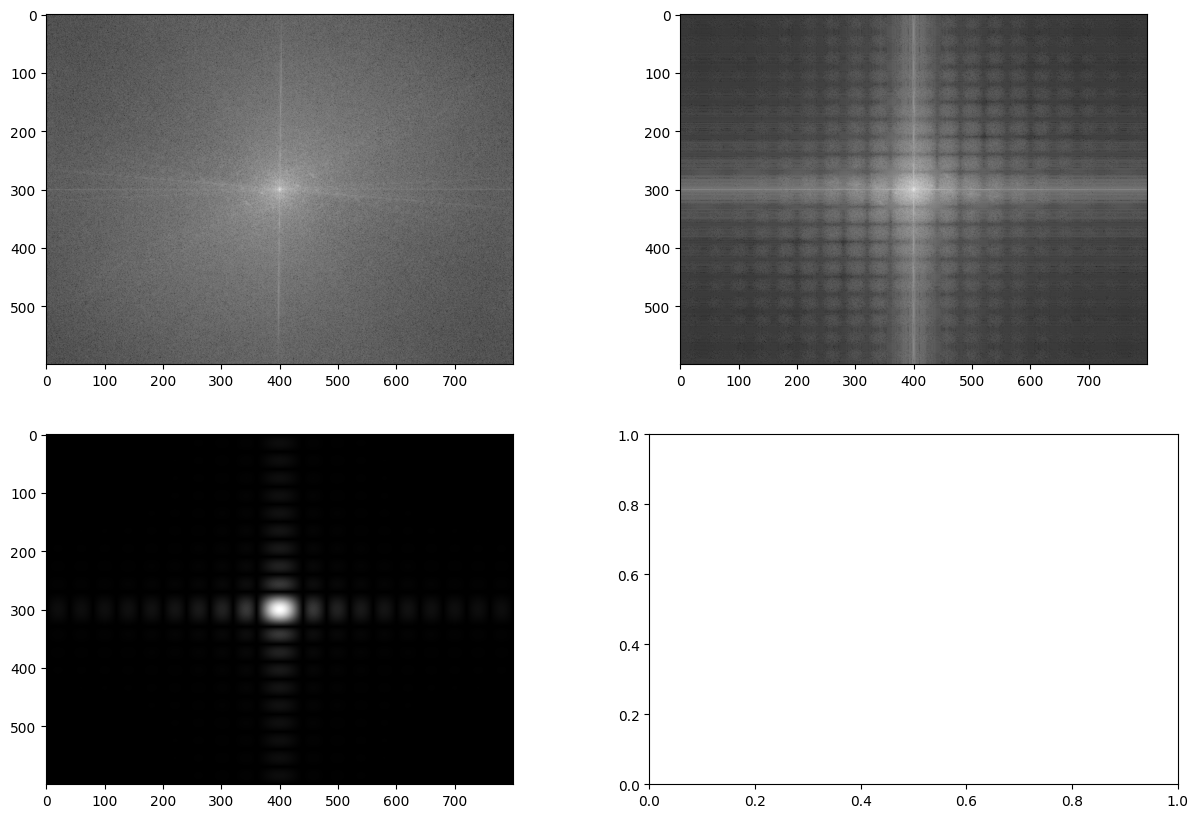

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (15, 10))

ax[0][0].imshow(np.log(np.abs(coat_ideal_ft_shift)), cmap='gray')
ax[0][1].imshow(np.log(np.abs(coat_blur_ft_shift)), cmap='gray')
ax[1][0].imshow(np.abs(moy_kernel_ft_shift), cmap='gray')

plt.show()

Commentaire :

2) c-

<ipython-input-36-4a086c84e0cf>:1: RuntimeWarning: divide by zero encountered in divide
  coat_estimated_ft = coat_blur_ft / moy_kernel_ft


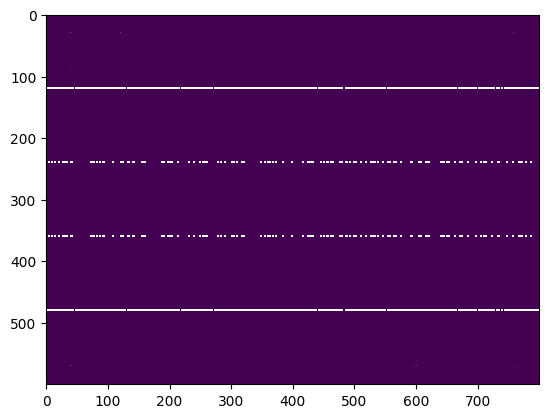

In [ ]:
coat_estimated_ft = coat_blur_ft / moy_kernel_ft
#plt.imshow(np.abs(coat_estimated_ft))
plt.imshow(np.real(np.fft.ifft2(coat_estimated_ft)))

In [ ]:
def divide_threshold(img_blur, ker_ft, threshold):
    img_estim = np.copy(img_blur)
    for i in range(img_blur.shape[0]):
        for j in range(img_blur.shape[1]):
            if np.abs(ker_ft[i,j]) > threshold:
                img_estim[i,j] = img_estim[i,j] / ker_ft[i,j]
    return img_estim

In [ ]:
def div_convert(img_blur, ker_ft, threshold):
    return np.real(np.fft.ifft2(divide_threshold(img_blur, ker_ft, threshold)))

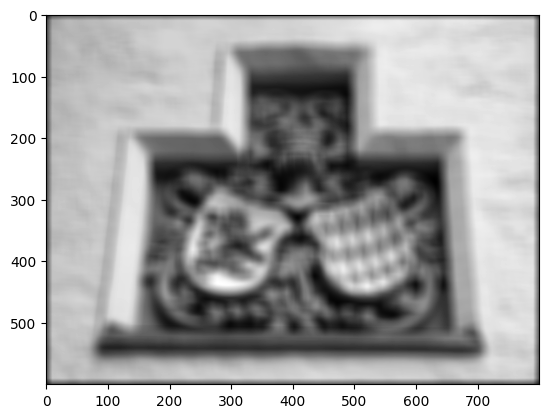

In [ ]:
plt.imshow(div_convert(coat_blur_ft, moy_kernel_ft, 1), cmap='gray')

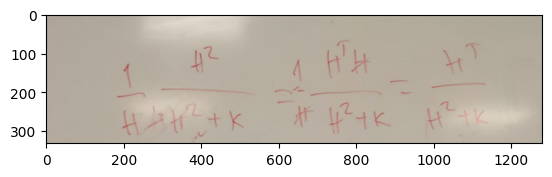

In [ ]:
w_expl = plt.imread('wiener_explained.jpg')
plt.imshow(w_expl)

In [ ]:
ker_ft_square = np.fft.fft2(moy_kernel, s=(800,800))
coat_blur_ft_square = np.fft.fft2(coat_blur, s=(800,800))

In [ ]:
def wiener_filter(img_blur, ker_ft, K):
    # Need a square mat => we do zero padding on img or s modif in fft ??????
    wiener = ker_ft.T / (np.abs(ker_ft)**2 + K)
    img_estim = img_blur * wiener
    return img_estim

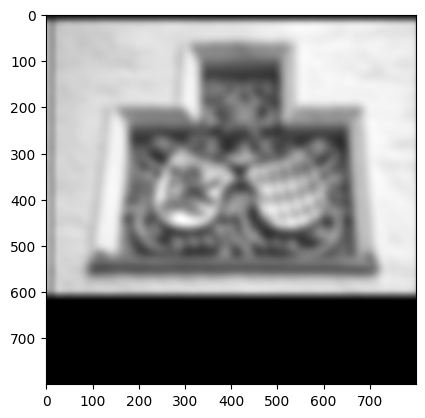

In [ ]:
plt.imshow(np.real(np.fft.ifft2((wiener_filter(coat_blur_ft_square, ker_ft_square, 5000)))), cmap='gray')